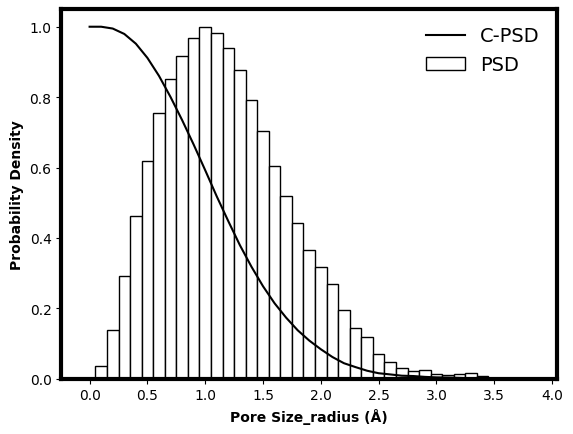

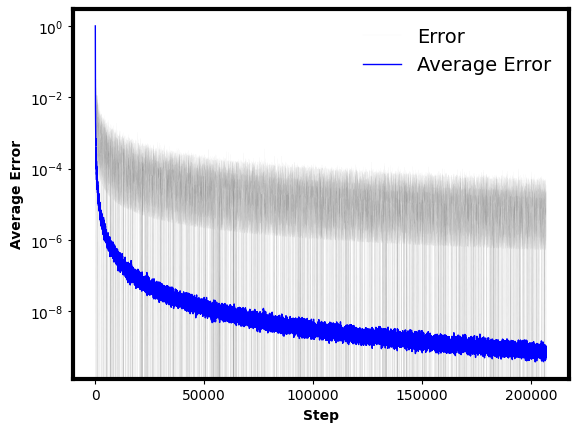

In [161]:
import matplotlib.pyplot as plt

rf_path = "generation/psd_diff.dat"
cf_path = "generation/psd_cumm.dat"
ef_path = "generation/error.dat"



Xr_lis = []
Xc_lis = []
Xe_lis = []
rf_lis = []
cf_lis = []
ef_lis = []
aef_lis = []

with open(rf_path, "r", encoding="utf-8") as f:
    for l in f:
        a, b = l.split()
        Xr_lis.append(float(a))
        rf_lis.append(float(b))

with open(cf_path, "r", encoding="utf-8") as f:
    for l in f:
        a, b = l.split()
        Xc_lis.append(float(a))
        cf_lis.append(float(b))

with open(ef_path, "r", encoding="utf-8") as f:
    for l in f:
        a, b, c, d  = l.split()
        Xe_lis.append(float(a))
        ef_lis.append(float(b))
        avg_v = 0
        if len(ef_lis) < 20:
            for i in range(len(ef_lis)):
                avg_v += ef_lis[i]
        else:
            for i in range(len(ef_lis)-20, len(ef_lis)):
                avg_v += ef_lis[i]
                
            
        aef_lis.append(avg_v / len(ef_lis))


fig, ax = plt.subplots()
ax.bar(Xr_lis, rf_lis, (Xr_lis[1]-Xr_lis[0]),label="PSD", color = "white", edgecolor="black", linewidth=1)
ax.plot(Xc_lis, cf_lis, label = "C-PSD", linestyle="-", color=[0,0,0])
ax.legend(frameon=False, fontsize =14)
#ax.set_title("", fontweight="bold")
ax.set_xlabel("Pore Size_radius (Å)", fontweight="bold")
ax.set_ylabel("Probability Density", fontweight="bold")
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

fig, ax = plt.subplots()
ax.plot(Xe_lis, ef_lis, label = "Error", linestyle="-", color=[0,0,0], linewidth=0.01)
ax.plot(Xe_lis, aef_lis, label = "Average Error", linestyle="-", color=[0,0,1], linewidth=1)
plt.yscale('log')
plt.legend(frameon=False, fontsize =14)
plt.xlabel("Step", fontweight="bold");plt.ylabel("Average Error", fontweight = "bold")
for spine in ax.spines.values():
    spine.set_linewidth(3)